In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pingouin import welch_anova,pairwise_gameshowell, pairwise_ttests
from scipy.stats import chi2,ttest_ind,mannwhitneyu,levene,bartlett,f_oneway,kruskal,shapiro,anderson,normaltest, chisquare
%matplotlib inline

In [2]:
games = pd.read_csv('appstore_games.csv')

In [3]:
games

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [5]:
games.describe(exclude = 'number')

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/gnomes-garden-ch...,Frontline : The Longest Day,Emoji Stickers,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


In [6]:
games['Price'].sample(5)

1734    0.00
5304    0.00
2743    0.00
197     0.99
2533    0.00
Name: Price, dtype: float64

In [7]:
games['Price'].drop_duplicates()

0          2.99
1          1.99
2          0.00
7          0.99
32         5.99
33         7.99
45         4.99
56         3.99
149        9.99
276       19.99
444        6.99
513       11.99
1322       8.99
2634     139.99
2937      12.99
4846      99.99
4886      14.99
7999      16.99
8177     179.99
8341        NaN
13730     37.99
14093     36.99
14281     29.99
14756     18.99
15031     59.99
Name: Price, dtype: float64

In [8]:
tipe = games.dtypes

In [9]:
hasil = pd.DataFrame(tipe)
hasil2 = hasil.reset_index()
hasil2

,index,0
0,URL,object
1,ID,int64
2,Name,object
3,Subtitle,object
4,Icon URL,object
5,Average User Rating,float64
6,User Rating Count,float64
7,Price,float64
8,In-app Purchases,object
9,Description,object


In [10]:
nullval = []
for i in games.columns:
    x = games[i].isna().sum()
    nullval.append(x)

In [11]:
hasil2['null'] = pd.DataFrame(nullval)

In [12]:
hasil2

,index,0,null
0,URL,object,0
1,ID,int64,0
2,Name,object,0
3,Subtitle,object,11746
4,Icon URL,object,0
5,Average User Rating,float64,9446
6,User Rating Count,float64,9446
7,Price,float64,24
8,In-app Purchases,object,9324
9,Description,object,0


In [13]:
nullpct = []
for i in games.columns:
    y = games[i].isna().sum()/len(games[i])*100
    nullpct.append(y.round(2))

In [14]:
hasil2['nullPct'] = pd.DataFrame(nullpct)

In [15]:
hasil2

,index,0,null,nullPct
0,URL,object,0,0.00
1,ID,int64,0,0.00
2,Name,object,0,0.00
3,Subtitle,object,11746,69.07
4,Icon URL,object,0,0.00
5,Average User Rating,float64,9446,55.54
6,User Rating Count,float64,9446,55.54
7,Price,float64,24,0.14
8,In-app Purchases,object,9324,54.82
9,Description,object,0,0.00


In [16]:
unique = []
for i in games.columns:
    z = games[i].nunique()
    unique.append(z)

In [17]:
hasil2['unique'] = pd.DataFrame(unique)
hasil2

,index,0,null,nullPct,unique
0,URL,object,0,0.00,16847
1,ID,int64,0,0.00,16847
2,Name,object,0,0.00,16847
3,Subtitle,object,11746,69.07,5010
4,Icon URL,object,0,0.00,16847
5,Average User Rating,float64,9446,55.54,9
6,User Rating Count,float64,9446,55.54,1792
7,Price,float64,24,0.14,24
8,In-app Purchases,object,9324,54.82,3803
9,Description,object,0,0.00,16473


In [18]:
uniqueSample = []
for i in games.columns:
    games[i].drop_duplicates()
    res = games[i].sample(2)
    uniqueSample.append(res.values)

In [19]:
hasil2['uniqueSample'] = uniqueSample
hasil2

,index,0,null,nullPct,unique,uniqueSample
0,URL,object,0,0.00,16847,[https://apps.apple.com/us/app/frozen-pet-pop-...
1,ID,int64,0,0.00,16847,"[580973122, 1154799329]"
2,Name,object,0,0.00,16847,"[Cat with paper door, Mafiaspillet.no]"
3,Subtitle,object,11746,69.07,5010,"[nan, nan]"
4,Icon URL,object,0,0.00,16847,[https://is1-ssl.mzstatic.com/image/thumb/Purp...
5,Average User Rating,float64,9446,55.54,9,"[4.5, 3.5]"
6,User Rating Count,float64,9446,55.54,1792,"[nan, nan]"
7,Price,float64,24,0.14,24,"[0.0, 1.99]"
8,In-app Purchases,object,9324,54.82,3803,"[nan, 0.99]"
9,Description,object,0,0.00,16473,"[""A strategy game for 2 to 8 players.\nThe obj..."


In [20]:
games['Average User Rating'].value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: Average User Rating, dtype: int64

In [21]:
# 4+ : diisi dengan 5
# 9+ : diisi dengan mean dari avg user rating keseluruhan umur di grup berdasarkan primary genre
# 12+ : diisi dengan mean dari avg user rating 12+ saja di grup berdasarkan primary genre
# 17+ : diisi dengan 5
import numpy as np

games2 = games.copy()
def fill_na(row):
    if ~np.isnan(row['Average User Rating']):
        return row['Average User Rating']
    else:
        ## 4+ & 17+
        if (row['Age Rating'] == '4+') or (row['Age Rating'] == '17+'):
            return float(5)
        if (row['Age Rating'] == '9+'):
            average1 = games2[(games2['Primary Genre'] == row['Primary Genre'])]['Average User Rating'].mean()
            return average1
        if (row['Age Rating'] == '17+'):
            average2 = games2[(games2['Age Rating'] == '12+') & (games['Primary Genre'] == row['Primary Genre'])]['Average User Rating'].mean()
games2['Average User Rating'] = games.apply(fill_na,axis=1)      

C:\Users\catin\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.2, the latest is 0.3.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [22]:
games2[games2['Age Rating'] == '17+']

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
73,https://apps.apple.com/us/app/shogi-demon/id30...,305620716,Shogi Demon,Japanese Chess,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,27.0,2.99,NaN,Shogi is Japanese Chess.\nThe difference betwe...,NUTRACTOR,17+,"EN, JA",20957184.0,Games,"Games, Strategy, Board",24/02/2009,13/07/2018
141,https://apps.apple.com/us/app/all-american-gir...,324530319,All American Girls Concentration Memory Game,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.0,291.0,0.99,NaN,"""17+ ONLY PLEASE! ADULTS ONLY! Play this Memor...","No Tie, LLC",17+,EN,9900032.0,Games,"Games, Entertainment, Strategy, Board",18/09/2009,26/07/2016
155,https://apps.apple.com/us/app/yahoo-fantasy-fo...,328415391,Yahoo Fantasy Football & more,Fantasy games for everyone,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,199585.0,0.00,NaN,"""The best in Fantasy Football, Baseball, Baske...",Yahoo,17+,"AR, BN, BG, CA, HR, CS, DA, NL, EN, ET, FI, FR...",145777664.0,Sports,"Sports, Games, Sports, Strategy",8/09/2009,27/07/2019
188,https://apps.apple.com/us/app/handgun-free/id3...,335941858,Handgun FREE,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.0,849.0,0.00,NaN,"""DOWNLOAD FOR FREE TODAY!\n\nLoad bullets by t...",Belprog Belprog,17+,EN,16375808.0,Entertainment,"Entertainment, Action, Strategy, Games",30/10/2009,2/04/2016
207,https://apps.apple.com/us/app/trenches/id34076...,340769953,Trenches,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,26674.0,0.99,NaN,*****************************\nThe original Tr...,"Catapult Consulting, LLC",17+,EN,37340259.0,Games,"Games, Strategy, Entertainment, Action",24/12/2009,6/12/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,https://apps.apple.com/us/app/yakala-i-stanbul...,1472267636,Yakala - \u0130stanbul,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,"""Canavarlar \u0130stanbul'u ke\u015ffetmeye ge...",Okte Cilmi,17+,TR,49720320.0,Games,"Games, Simulation, Strategy, Entertainment",31/07/2019,31/07/2019
16934,https://apps.apple.com/us/app/football-multipl...,1472843467,Football multiplayer,beat your friends - football,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,Football Multiplayer online game\n\nplay games...,virendra kumre,17+,EN,39851008.0,Games,"Games, Sports, Strategy, Entertainment",1/08/2019,1/08/2019
16942,https://apps.apple.com/us/app/flying-carpet-sh...,1472974346,Flying Carpet Shooting,Carpet Shooting,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,NaN,NaN,Fly through the skies with your magic carpet a...,NGUYEN VAN QUANG,17+,EN,101702656.0,Games,"Games, Strategy, Entertainment, Music",13/10/2019,13/10/2019
16951,https://apps.apple.com/us/app/war-shooting-bat...,1473098634,War Shooting Battle Survival,Shooting Battle Survival,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,NaN,NaN,Play as a last world war hero to recapture arm...,VONG KIM PHUONG,17+,EN,261016576.0,Games,"Games, Entertainment, Casual, Strategy",14/10/2019,14/10/2019


# LATIHAN PANDAS

#### 1. Apakah panjang jumlah kata(bukan panjang kata) yang ada di Feature Description secara umum mempengaruhi feature price dari app?
## JAWABAN PERTANYAAN No. 1

In [23]:
jumlah_kata = []
for i in games2['Description']:
    splt = len(i.split())
    jumlah_kata.append(splt)

In [24]:
games2['Count_Words'] = jumlah_kata

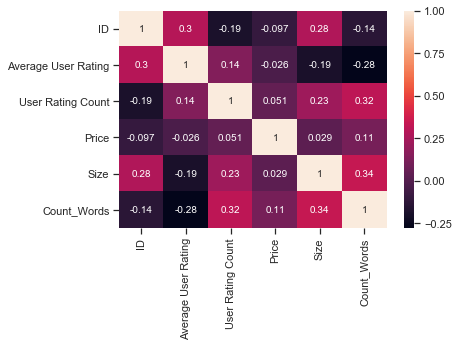

In [25]:
sns.heatmap(games2.corr(method = 'spearman'), annot = True)

In [26]:
games2['Count_Words'].describe()

count    17007.000000
mean       158.644323
std        127.935918
min          1.000000
25%         64.000000
50%        123.000000
75%        216.000000
max        813.000000
Name: Count_Words, dtype: float64

In [27]:
lis = []
for i in games2['Count_Words'].values:
    if i >= 1 and i <= 225:
        lis.append('1 - 225')
    elif i >= 226 and i <= 450:
        lis.append ('226 - 450')
    elif i >= 451 and i <= 675:
        lis.append('451 - 675')
    elif i >= 676 and i <= 900:
        lis.append('676 - 900')
        
games2['Group_Count_Words'] = lis

In [28]:
games2

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Count_Words,Group_Count_Words
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,259,226 - 450
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,204,1 - 225
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,97,1 - 225
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,267,226 - 450
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,365,226 - 450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019,84,1 - 225
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019,27,1 - 225
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019,70,1 - 225
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019,24,1 - 225


In [29]:
games2['Price'].fillna(games2['Price'].mean(),inplace=True)

In [30]:
a=games2[games2['Group_Count_Words']=='1 - 225'].copy()
b=games2[games2['Group_Count_Words']=='226 - 450'].copy()
c=games2[games2['Group_Count_Words']=='451 - 675'].copy()
d=games2[games2['Group_Count_Words']=='676 - 900'].copy()

## DISTRIBUTION TEST

In [31]:
def try_normal(data):
    result={'Anderson':{i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro':shapiro(data)[1],
           'K^2':normaltest(data)[1]}
    result['Anderson']['stat']=anderson(data)[0]
    return result

def try_equal_var(x1,x2,x3,x4):
    result = {'Levene': {'Levene-Stat': levene(x1,x2,x3,x4)[0], 'P-Value': levene(x1,x2,x3,x4)[1]}}
    return result

isi=[a,b,c,d]

In [32]:
print(try_normal(games2[(games2['Group_Count_Words'] == '1 - 225')]['Price']))
print(try_normal(games2[(games2['Group_Count_Words'] == '226 - 450')]['Price']))
print(try_normal(games2[(games2['Group_Count_Words'] == '451 - 675')]['Price']))
print(try_normal(games2[(games2['Group_Count_Words'] == '676 - 900')]['Price']))

{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3439.336501402053}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1070.7723544564142}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.573, 10.0: 0.652, 5.0: 0.783, 2.5: 0.913, 1.0: 1.086, 'stat': 168.0946180187127}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.503, 10.0: 0.573, 5.0: 0.687, 2.5: 0.802, 1.0: 0.954, 'stat': 3.3165369425361604}, 'Shapiro': 9.202584806189407e-06, 'K^2': 0.003184061914310735}


C:\Users\catin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.

C:\Users\catin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



### DISTRIBUSI DATA TIDAK NORMAL KARENA STATNYA  LEBIH KECIL DARI ALPHA 0.05 (5.0%)

In [33]:
try_equal_var(a['Price'],b['Price'],c['Price'],d['Price'])

{'Levene': {'Levene-Stat': 57.24233364665326,
  'P-Value': 8.254895420193986e-37}}

### UNEQUAL VARIANCE, KARENA PVALUE-NYA LEBIH KECIL DARI 0.05 (5.0%)

In [34]:
kruskal(a['Price'],b['Price'],c['Price'],d['Price'])

KruskalResult(statistic=122.01810556409224, pvalue=2.836440892565227e-26)

### BERDASARKAN KRUSKAL TEST TERDAPAT PERBEDAAN DISTRIBUSI HARGA SECARA SIGNIFIKAN

In [35]:
games2['Group_Count_Words'].unique()

array(['226 - 450', '1 - 225', '451 - 675', '676 - 900'], dtype=object)

In [36]:
pairwise_ttests(data=games2, dv='Price', between='Group_Count_Words', parametric=True)

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Group_Count_Words,226 - 450,1 - 225,False,True,6.496,3218.99,two-sided,9.534962e-11,3.049e+07,0.254
1,Group_Count_Words,226 - 450,451 - 675,False,True,3.147,3465.06,two-sided,1.663912e-03,6.32,0.074
2,Group_Count_Words,226 - 450,676 - 900,False,True,6.137,523.93,two-sided,1.659765e-09,7.317e+06,0.119
3,Group_Count_Words,1 - 225,451 - 675,False,True,-3.862,725.04,two-sided,1.224535e-04,71.388,-0.391
4,Group_Count_Words,1 - 225,676 - 900,False,True,0.509,17.39,two-sided,6.168144e-01,0.272,0.042
5,Group_Count_Words,451 - 675,676 - 900,False,True,3.521,167.90,two-sided,5.537152e-04,55.636,0.159


### Uji ini menunjukkan terdapat perbedaan data Price tiap Group Count Words, Akan dilihat perbedaan apa saja yang dimiliki. Dalam hal ini akan digunakkan uji pairwise nonparametric

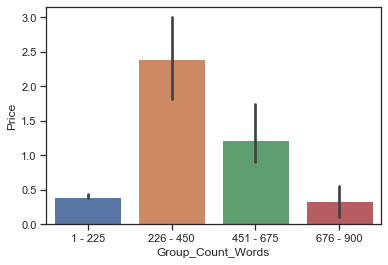

In [37]:
sns.barplot(data = games2, x = 'Group_Count_Words',y='Price',
            order=['1 - 225', '226 - 450', '451 - 675', '676 - 900'])

## JAWAB: berpengaruh, untuk range kata 226-675 kata, namun untuk yang > 676 kata harganya cenderung sama dengan yang descriptionnya 1-225 kata

#### 2. Berikan penjelasan yang bisa kalian lihat, kenapa Feature Average User Rating , User Rating Count, dan in-app Purchases memiliki banyak Null Value?
## JAWABAN PERTANYAAN NO. 2

In [38]:
games[games['User Rating Count'].isna()]['Average User Rating'].unique()

array([nan])

In [39]:
games[games['Average User Rating'].isna()]['User Rating Count'].unique()

array([nan])

In [40]:
games[games['In-app Purchases'].notnull()]['Price'].value_counts()

0.00      7090
0.99       191
2.99       109
1.99       103
4.99        66
11.99       42
3.99        30
9.99        11
5.99        10
6.99         5
19.99        4
8.99         3
12.99        2
7.99         2
14.99        1
139.99       1
18.99        1
Name: Price, dtype: int64

In [41]:
games[games['In-app Purchases'].isna()]['Price'].value_counts()

0.00      7122
0.99       887
1.99       412
2.99       362
4.99       171
3.99       133
9.99        77
5.99        32
179.99      30
6.99        27
11.99       17
7.99        15
8.99        10
19.99        5
14.99        3
16.99        2
29.99        2
59.99        1
36.99        1
99.99        1
12.99        1
37.99        1
Name: Price, dtype: int64

#### 3. Apakah Feature Original Release Date dan Current Version Release Date mempengaruhi Feature Price?
## JAWABAN PERTANYAAN NO. 3

In [42]:
games2['Original Release Date'] = pd.to_datetime(games2['Original Release Date'],utc='none')
games2['Current Version Release Date'] = pd.to_datetime(games2['Current Version Release Date'],utc='none')

In [43]:
games2['ori_year'] = games2['Original Release Date'].dt.year
games2['ori_week'] = games2['Original Release Date'].dt.weekday
games2['ori_day_name'] = games2['Original Release Date'].dt.weekday_name

In [44]:
games2['curr_year'] = games2['Current Version Release Date'].dt.year
games2['curr_week'] = games2['Current Version Release Date'].dt.weekday
games2['curr_day_name'] = games2['Current Version Release Date'].dt.weekday_name

In [45]:
games2['ori_curr_gap'] = (games2['Current Version Release Date'] - games2['Original Release Date']).dt.days

In [46]:
games2

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Current Version Release Date,Count_Words,Group_Count_Words,ori_year,ori_week,ori_day_name,curr_year,curr_week,curr_day_name,ori_curr_gap
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,2017-05-30 00:00:00+00:00,259,226 - 450,2008,4,Friday,2017,1,Tuesday,3126
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,2018-05-17 00:00:00+00:00,204,1 - 225,2008,4,Friday,2018,3,Thursday,3478
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,2017-05-09 00:00:00+00:00,97,1 - 225,2008,4,Friday,2017,1,Tuesday,3105
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,2017-05-30 00:00:00+00:00,267,226 - 450,2008,2,Wednesday,2017,1,Tuesday,3233
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,2018-07-22 00:00:00+00:00,365,226 - 450,2008,4,Friday,2018,6,Sunday,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",...,2019-07-30 00:00:00+00:00,84,1 - 225,2019,1,Tuesday,2019,1,Tuesday,0
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,...,2019-01-08 00:00:00+00:00,27,1 - 225,2019,1,Tuesday,2019,1,Tuesday,0
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",...,2019-03-08 00:00:00+00:00,70,1 - 225,2019,4,Friday,2019,4,Friday,0
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5.0,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,...,2019-01-08 00:00:00+00:00,24,1 - 225,2019,1,Tuesday,2019,1,Tuesday,0


In [47]:
user_na = games2[games2['User Rating Count'].isna()].copy()
print('Original Data')
print(games['Age Rating'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['Age Rating'].value_counts())

Original Data
4+     11806
9+      2481
12+     2055
17+      665
Name: Age Rating, dtype: int64

User Rating Null Data
4+     7339
9+     1009
12+     722
17+     376
Name: Age Rating, dtype: int64


In [48]:
print('Original Data')
print(games['Price'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['Price'].value_counts())

Original Data
0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
59.99         1
139.99        1
37.99         1
18.99         1
Name: Price, dtype: int64

User Rating Null Data
0.000000      7887
0.990000       726
1.990000       314
2.990000       219
3.990000        58
11.990000       56
4.990000        52
9.990000        40
179.990000      30
0.813419        24
5.990000        14
7.990000         7
6.990000         6
19.990000        4
14.990000        2
29.990000        2
18.990000        1
16.990000        1
99.990000        1
37.990000        1
8.990000         1
Name: Price, dtype: int64


In [49]:
print('Original Data')
print(games2['ori_year'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['ori_year'].value_counts())

Original Data
2016    3126
2017    2818
2018    2504
2015    2216
2014    1893
2019    1570
2013    1161
2012     729
2011     490
2010     277
2009     176
2008      47
Name: ori_year, dtype: int64

User Rating Null Data
2016    2079
2017    1854
2018    1600
2015    1318
2019    1093
2014     938
2013     326
2012     131
2011      78
2010      22
2009       4
2008       3
Name: ori_year, dtype: int64


In [50]:
print('Original Data')
print(games2['curr_year'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['curr_year'].value_counts())

Original Data
2019    3789
2017    3486
2018    3207
2016    2881
2015    1626
2014    1100
2013     515
2012     224
2011     108
2010      48
2009      17
2008       6
Name: curr_year, dtype: int64

User Rating Null Data
2017    2192
2016    1928
2018    1855
2019    1715
2015     986
2014     584
2013     147
2012      24
2011      12
2010       2
2008       1
Name: curr_year, dtype: int64


In [51]:
print('Original Data')
print(games2['ori_curr_gap'].value_counts())
print('')
print('User Rating Null Data')
print(user_na['ori_curr_gap'].value_counts())

Original Data
0       6240
1         57
3         52
61        45
31        45
        ... 
2011       1
2027       1
2077       1
2084       1
4086       1
Name: ori_curr_gap, Length: 2690, dtype: int64

User Rating Null Data
 0       5030
 1         41
 3         30
 4         29
 31        29
         ... 
-100        1
-68         1
 2085       1
 2061       1
 1651       1
Name: ori_curr_gap, Length: 1584, dtype: int64
